### INTRODUCTION

In [ ]:
from IPython.display import Image
Image(url= "image/theatres.jpg", width=400, height=400)

**WHAT WAS THE FIRST MOVIE EVER MADE?**

If you love films (aka Movies), you would probably wonder what was the first movie that was made. This takes us back to the 18th Century. 
In the late 1880's various people embarked on an experimental journey to put a photograph into motion, they blended a group of photographs together to form what was then called "*a motion picture*". This *motion picture* in those days was called a film, that was the birth of film (AKA a movie). The likes of "**The horse in motion (in 1878)**" which only lasted for 1 second, followed by **Roundhay Garden scene (in 1885)** which was 2.11 seconds long, **Arrival of the Train(in 1895)** which lasted 50 seconds,Just so you get the idea.

- Now, according to IMDB, since 1900 there's been an approximately 2,577 movies release each year, the lowest incline was in 1945 with   1,038. 
- In the year 1964 the yearly tally was back up at 2,509 and then there has never been any year with a lower number that this since.
- In the past 16 years, the movie production doubled the number of movies produced each year continuously moving from 4,584 in the year 2005, to 9,387 in the year 2015. 

### PROBLEM STATEMENT

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA has set up a challenge to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

### RECOMMENDATION SYSTEMS

A recommendation system is a system developed to selectively choose information according to the user's needs, importance, and previous experiences giving information to users. Some examples of recommender systems in action include product recommendations on Amazon, Netflix suggestions for movies and TV shows in your feed, recommended videos on YouTube, Music on spotify, Facebook newsfeed, LinkedIn connection, Google Ads, and the list goes on...

Important component of any of these systems is the recommender fuction, Which takes information about the user and predicts the rating that user might assign to a product(The movie in our case) for example. Predicting user ratings, even before the user has actually provided one, makes recommender systems a powerful tool.

Let's get down to it!!!

## Installing packages and Import libraries

In [1]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from surprise.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import itertools
import scipy as sp

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from sklearn.cluster import KMeans
from surprise import KNNWithMeans
from sklearn.neighbors import NearestNeighbors
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

# Packages for model evaluation
from scipy.sparse import csr_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

## Reading in data

In [2]:
#importing the datasets 
df_train = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/train.csv')
df_test = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/test.csv')
df_tags = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/tags.csv')
df_movies = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/movies.csv')
df_links = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/links.csv')
df_imdb= pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/imdb_data.csv')
df_genome_scores = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/genome_scores.csv')
df_genome_tags = pd.read_csv('~/Documents/GitHub/Recommendation predict/datasets/genome_tags.csv')

**UNDERSTANDING THE DATASET**

The data comes from 8 tables which shows relationship columns among the data in the form of Primary key-Foreign key relationships, this could tell us that the tables are a results from a properly normalized database.
The tables contains columns( features) which we can analyse to get insight from the data and make recommendations for users.

**Features**

* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **MovieId:** The ID of the move.
* **UserId:** The ID of the user.
* **imdb_id:** The IMDB ID of the movie.
* **plot_keywords:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **release_date:** Theatrical Release Date of the mo
* **runtime:** The runtime of the movie in minutes.
* **status:** The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline:** The tagline of the movie.
* **title:** The Official Title of the movie.
* **director:** The names of the person(s) who directed the movie
* **title_cast:** The list of actors in the movie
* **Genome_score:**  a score mapping the strength between movies and tag-related properties
* **genome.tag:** user assigned tags for genome-related scores
* **Relevance:**
* **tagId:** The Id column for each tag in the table
* **tag:** The label of category to which the movie belongs to
* **timestamp:** The digital date and time for when the data was recorded

In [4]:
#How many records do we have of each table
print('The dataset contains: ', len(df_genome_scores), ' ratings of ', len(df_movies), ' movies.')

The dataset contains:  15584448  ratings of  62423  movies.


### DATA WRANGLING

This data was originally obtained as a CSV files is already at a fromart that could be loaded into a Pandas DataFrame effortlessly. In other words, the dataset we have in our hands is already relatively clean. We will however attempt at learning more about our features and performing appropriate wrangling steps to arrive at a form that is more suitable for analysis.

In [20]:
#this display the full width of the columns
pd.set_option("display.max_colwidth", -1)

In [6]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allison Levine,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti Williamson|Michael Beach|Leon|Wendell Pierce|Donald Faison|Jeffrey D. Sams|Jazz Raycole|Brandon Hammond|Kenya Moore,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betrayal|mother son relationship
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


This table above contains more text data which can be useful in terms of content based filtering, such as the title_cast clumn,director and also plot_keywords columns.

In [7]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [10]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [11]:
df_genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [12]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [4]:
final_dataset = df_genome_scores.pivot(index='movieId',columns='tagId',values='relevance')
final_dataset.head()

tagId,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,0.03075,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,0.05250,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,0.03875,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,0.03150,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,0.02975,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


In [5]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

tagId,1,2,3,4,5,6,7,8,9,10,...,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,0.03075,...,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,0.05250,...,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,0.03875,...,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,0.03150,...,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,0.02975,...,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


**Merging the Dataframes**

- Merging based on Genome scores and relevance scores

In [6]:
df_movies['movieId']= df_movies['movieId'].astype(int)
df_genome_scores['movieId']=df_genome_scores['movieId'].astype(int)
df=df_movies.merge(df_genome_scores,on='movieId')
df.head()

,movieId,title,genres,tagId,relevance
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0.02875
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,0.02375
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,0.06250
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,0.07575
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0.14075


In [7]:
df=df.drop("tagId",axis=1)

In [8]:
#grouping data by title and count of ratings
genome_scores_count=df.groupby(['title'], as_index = False)[['relevance']].count()
genome_scores_count['genome_scores_count']=genome_scores_count['relevance']
genome_scores_count=genome_scores_count.drop("relevance", axis=1)
genome_scores_count.head()

,title,genome_scores_count
0,"""Great Performances"" Cats (1998)",1128
1,$5 a Day (2008),1128
2,$9.99 (2008),1128
3,'71 (2014),1128
4,'Hellboy': The Seeds of Creation (2004),1128


In [9]:
final_df=pd.merge(df,genome_scores_count,on='title')
final_df.head()

,movieId,title,genres,relevance,genome_scores_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.02875,1128
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.02375,1128
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.06250,1128
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.07575,1128
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.14075,1128


In [10]:
final_df_=final_df.groupby(['movieId','title','genres','genome_scores_count'], as_index = False)[['relevance']].mean()
final_df_['genome_scores_mean']=final_df_['relevance']
final_df_=final_df_.drop("relevance",axis=1)
final_df_.head()

,movieId,title,genres,genome_scores_count,genome_scores_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1128,0.163382
1,2,Jumanji (1995),Adventure|Children|Fantasy,1128,0.122205
2,3,Grumpier Old Men (1995),Comedy|Romance,1128,0.092110
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1128,0.087318
4,5,Father of the Bride Part II (1995),Comedy,1128,0.093966


In [11]:
a=final_df_['genome_scores_mean'].mean()
a

0.11636786379921875

In [12]:
b=final_df_['genome_scores_count'].quantile(0.85)
b

1128.0

In [13]:
final_df_.shape

(13816, 5)

In [14]:
c_movies=final_df_.copy().loc[final_df_['genome_scores_count'] >= b]
c_movies.shape

(13816, 5)

In [15]:
def weighted_rating(x, b=b, a=a):
    v = x['genome_scores_count']
    R = x['genome_scores_mean']
    # Calculation based on the IMDB formula
    return (v/(v+b) * R) + (b/(b+v) * a)

In [16]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
c_movies['score'] = c_movies.apply(weighted_rating, axis=1)

In [17]:
#Sort movies based on score calculated above
c_movies = c_movies.sort_values('score', ascending=False)

#Print the top 15 movies
c_movies[['title', 'genome_scores_count', 'genome_scores_mean', 'score']].head(15)

,title,genome_scores_count,genome_scores_mean,score
9673,Passchendaele (2008),1128,0.337627,0.226997
10009,Welcome to Dongmakgol (2005),1128,0.308385,0.212376
11376,"Band Called Death, A (2012)",1128,0.281792,0.199080
12154,Drunk Stoned Brilliant Dead: The Story of the ...,1128,0.281420,0.198894
5322,"Whistle Blower, The (1986)",1128,0.276406,0.196387
7374,Death Rides a Horse (Da uomo a uomo) (1967),1128,0.268978,0.192673
10414,No Mercy (Yongseoneun Eupda) (2010),1128,0.258476,0.187422
11101,Doomsday Book (2012),1128,0.254818,0.185593
13742,The Farewell (2019),1128,0.254529,0.185448
8740,Triad Election (Election 2) (Hak se wui yi wo ...,1128,0.250000,0.183184


In [18]:
genres=[]
for genre in df_movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in df_movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

**Merging based on numerical columns**

In [3]:
movie_desc = df_train.merge(df_movies, on = 'movieId', how = 'left' )
movie_desc.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller


In [11]:
movie_desc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 10000037
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 534.1+ MB


**Grouping the numerical columns**
- This will help filtering the numerical column and reduce the volume of the dataset
- The merged numerical column data frame that is to created will be used to create summary statistics and to check correlation and relationships amongs our features

In [12]:
train_df= df_train.drop(['userId','timestamp'], axis=1)
genome_scores_df = df_genome_scores.drop('tagId', axis = 1)
imdb_data_df = df_imdb.drop(['title_cast','director','plot_keywords'],axis=1)

In [14]:
train_genome = train_df.merge(imdb_data_df, on = 'movieId')

**Checking for null values**

In [15]:
#Checking for nulls 
print(train_genome.isnull().sum())

movieId    0      
rating     0      
runtime    2653058
budget     3152276
dtype: int64


**Removing null values**

In [16]:
df = train_genome[train_genome['budget'].notna()]
merged_df= df[df['runtime'].notna()]

In [17]:
print(merged_df.isnull().sum())

movieId    0
rating     0
runtime    0
budget     0
dtype: int64


In [17]:
genome_scores_df.shape

(15584448, 2)

**Taking a random sample**

- The genome_score dataframe contain 15 million rows, this will cause a very high computational expense given that the merged dataframe will be used for data visualization. We will thus take random sample of 10 thousand rows from each dataframe.

In [18]:
sample_genome_scores = genome_scores_df.sample(n=10000)
merged_df_sample = merged_df.sample(n= 10000)

This is a ramdom sample of 10 000 observations from the data for data visualization, since the full dataset takes quite longer amount of time to complete the merge and it shall be used only for data visualization.

In [19]:
numeric_col = sample_genome_scores.merge(merged_df_sample, on = 'movieId')

In [20]:
numeric_col.head()

,movieId,relevance,rating,runtime,budget
0,80917,0.02625,3.5,94.0,"$500,000"
1,80917,0.02625,2.5,94.0,"$500,000"
2,80917,0.02625,3.0,94.0,"$500,000"
3,80917,0.02700,3.5,94.0,"$500,000"
4,80917,0.02700,2.5,94.0,"$500,000"


**Summary of Data wrangling**

- All the tables has been checked for null values and the above codes proves that there are no primary nulls (nulls from the original data).
- All the columns have been checked for correct column data types and proper storage of the data
- All the tables have friendly Primary keys and foreign keys which are necesary for any merge and/or table Joins


### EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis is a process of examining or understanding the data and extracting insights or main characteristics of the data. EDA is generally classified into two methods, i.e. graphical analysis and non-graphical analysis.EDA is very essential because it is a good practice to first understand the problem statement and the various relationships between the data features before getting your hands dirty.

**DATA VISUALIZATIONS**

In [85]:
import re

In [86]:
def getYear(title):
    result = re.search(r'\(\d{4}\)', title)
    if result:
        found = result.group(0).strip('(').strip(')')
    else: 
        found = 0
    return int(found)
    
df_movies['year'] = df_movies.apply(lambda x: getYear(x['title']), axis=1)
# movies.head(10)

In [87]:
genresList = [
  "Action",
  "Adventure",
  "Animation",
  "Children",
  "Comedy",
  "Crime",
  "Documentary",
  "Drama",
  "Fantasy",
  "Film-Noir",
  "Horror",
  "Musical",
  "Mystery",
  "Romance",
  "Sci-Fi",
  "Thriller",
  "War",
  "Western",
    "(no genres listed)"
]

def setGenresMatrix(genres):
    movieGenresMatrix = []
    movieGenresList = genres.split('|')
    for x in genresList:
        if (x in movieGenresList):
            movieGenresMatrix.append(1)
        else:
            movieGenresMatrix.append(0) 
    return movieGenresMatrix
    
df_movies['genresMatrix'] = df_movies.apply(lambda x: np.array(list(setGenresMatrix(x['genres']))), axis=1)

df_movies.head(5)

,movieId,title,genres,year,genresMatrix
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
4,5,Father of the Bride Part II (1995),Comedy,1995,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [89]:
from wordcloud import WordCloud

In [90]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

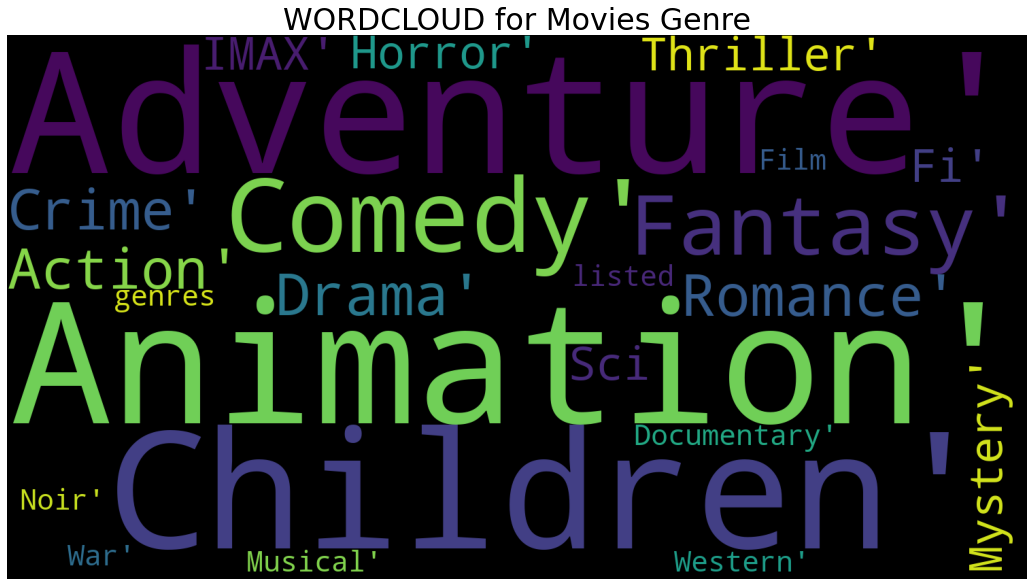

In [72]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

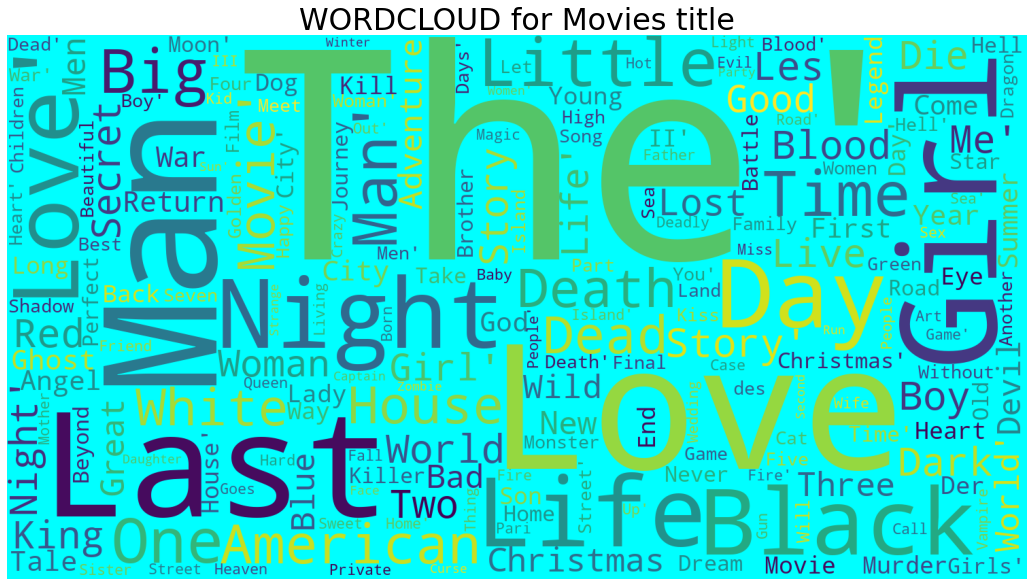

In [73]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

In [19]:
usergenome_scoresAggr = df_genome_scores.groupby(['tagId']).agg({'relevance': [np.size, np.mean]})
usergenome_scoresAggr.reset_index(inplace=True)  # To reset multilevel (pivot-like) index
# usergenome_scoresAggr.head()

In [ ]:
usergenome_scoresAggr['relevance'].describe()

In [ ]:
moviegenome_scoresAggr = df_genome_scores.groupby(['movieId']).agg({'relevance': [np.size, np.mean]})
moviegenome_scoresAggr.reset_index(inplace=True)
# moviegenome_scoresAggr.head()

In [ ]:
moviegenome_scoresAggr['relevance'].describe()

<AxesSubplot:>

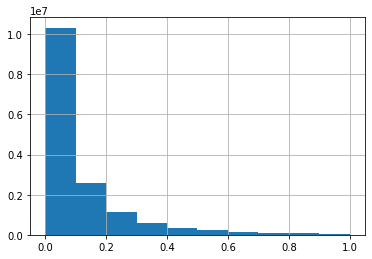

In [43]:
df_genome_scores['relevance'].hist()

- The relevance scores ranges from 0 to 1, each movie has a relevance score for every tag.
- The above histogram shows that most of the scores are zeros (0.0) which may result in poor performance for collaborative recommendation algorithms which are based on tags.
- This is explained by the statistical summery below, which shows that the median of th data is and also the maximum score is  which is below the middle score between 0 and 1 in the rational number scales.

**Ratings**

Let's start by displaying movies with highest ratings, that being 5 and the total number of users rated the movie

In [23]:
Average_ratings = pd.DataFrame(movie_desc.groupby('title')['rating'].mean().sort_values(ascending=False))
Average_ratings['Total_Ratings'] = pd.DataFrame(movie_desc.groupby('title')['rating'].count())
Average_ratings.head(10)

,rating,Total_Ratings
title,,
Final Recourse (2013),5.0,1
Lady and the Tramp (2019),5.0,1
Virasat (1997),5.0,1
Committed (2014),5.0,1
Sole Proprietor (2016),5.0,1
The Doll (2017),5.0,1
Hempsters: Plant the Seed (2008),5.0,1
Nero's Guests (2009),5.0,1
Nesting (2012),5.0,1


These are our top ten movies with a high rating, but looking at the total number of ratings, it shows only 1 user for each movie in our top ten has given that rating.

Let's go on and check for each rating value, how many times does it appear in our dataset. This will help us identify the most score that users have given.

In [22]:
df_train['rating'].value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5    880516 
2.0    656821 
2.5    505578 
1.0    311213 
1.5    159731 
0.5    157571 
Name: rating, dtype: int64

This shows that 4 is the most highest rating value, but let's plot that on a bar graph and see the rating distributions.

<AxesSubplot:>

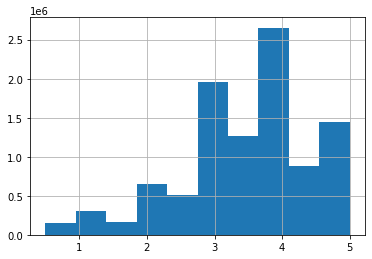

In [49]:
df_train['rating'].hist(bins = 10)

According to the histogram above it shoes that mosted rating score given is 4, followed by 3 and 5.

we can also plot the ratings against the number of movies, as in the bar graph below to also see the number of movies rated.

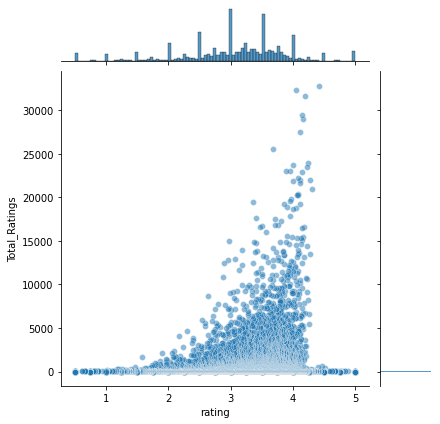

In [53]:
sns.jointplot(x='rating',y='Total_Ratings',data=Average_ratings,alpha=0.5)

The scatter plot in the middle, shows the ratings agains the total ratings.
Most ratings ranges between 3 and 4 and are the same ratings with high number of ratings, this implies that most lower ratings (i.e. 1 and 2) are very few and also ratings of 5 are also few.

**Correlation Heatmap**

- Here we are trying to find out relationships among our features.
- a quick refresher: In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related.

- Correlation scores are as follows
  - 1 => Positive correlated
  - 0 => No correlation
  - -1 => Negative correlation

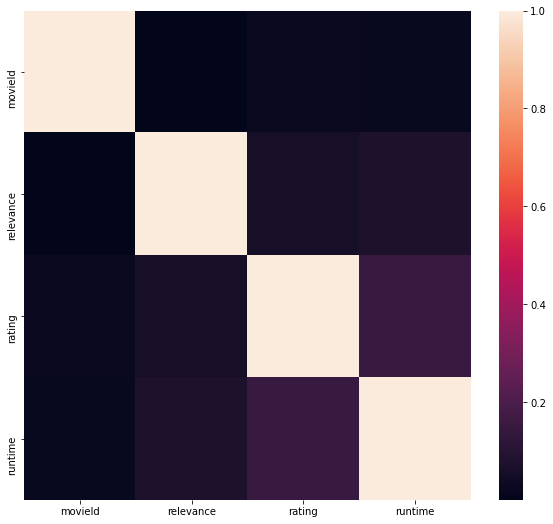

In [44]:
#creating a correlation heat map
corr = numeric_col.corr()
plt.subplots(figsize=(10,9))
sns.heatmap(corr)

- This shows no correlation between our numerical columns, as it is displayed by most dark (to black colour).

**Satter plots**

Text(0.5, 1.0, 'Movie budget vs relevance')

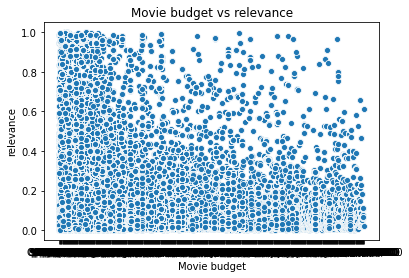

In [45]:
#plotting scatter plot
sns.scatterplot(x='budget',y='relevance',data= numeric_col)
plt.xlabel('Movie budget')
plt.ylabel('relevance')
plt.title('Movie budget vs relevance')

- The above scatter plot supports the correlation heatmap to show no positive or negative relationship between budget and relevance score of any movie, this can further be said that more budget for the movie doesn't necesarily improves movie relevance score.

### DATA PREPROCESSING

### MODEL BUILDING AND TRAINING

### COLLABORATIVE FILTERING 

Collaborative filtering methods predict the target user’s rating of a given item using similar users’ ratings of that item.
There are two ways to approach collaborative filtering:
- Memor-based or neighbourhood based collaborative filtering
- Model based collaborative filtering

**MEMORY BASED COLLABORATIVE FILTERING**

Memory-based or neighborhood-based methods are a simple way of harnessing the ratings of others users to predict ratings. They themselves come in two varieties: user-based and item-based. User-based collaborative filtering forms a pool of similar users and averages of their ratings of the target item. Item-based collaborative filter forms a pool of similar items, and averages the target user’s ratings of those items.

In [21]:
#import movies 
movies = df_movies.copy()
#import train data as ratings
ratings = df_train.copy()

Let's revisit the dataframes 

In [22]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
ratings.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


Lets analyze the data first to understand what we are working with.

To Start the analysis, lets first take a subset of users and check their likings, this is going to be analysed based on two genres from the dataset.


**TWO GENRES**

In [24]:
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    
    genre_ratings.columns = column_names
    #print(genre_ratings)
    return genre_ratings

In [25]:
ratings_twogenre = get_genre_ratings(ratings, movies, ['Crime', 'Thriller'], ['avg_crime_rating', 'avg_thriller_rating'])
ratings_twogenre.head()

,avg_crime_rating,avg_thriller_rating
1,4.12,5.00
2,2.39,3.77
3,3.91,3.65
4,3.68,3.20
5,4.25,3.82


In [26]:
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset = genre_ratings[((genre_ratings['avg_crime_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_thriller_rating'] > score_limit_2)) | ((genre_ratings['avg_thriller_rating'] < score_limit_1) & (genre_ratings['avg_crime_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset

In [27]:
refined_dataset_twogenre = bias_genre_rating_dataset(ratings_twogenre, 3.5, 2.5)
refined_dataset_twogenre.head()

,index,avg_crime_rating,avg_thriller_rating
0,2,2.39,3.77
1,4,3.68,3.20
2,7,3.00,3.00
3,12,3.57,3.17
4,18,3.15,3.66


Lets draw a scatter plot to understand the data distribution for each of the users.

In [28]:
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)

    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)

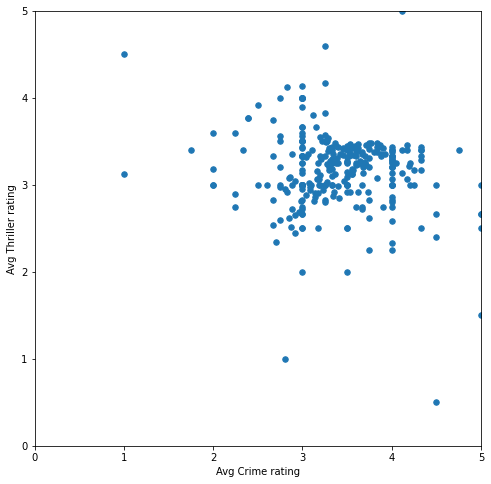

In [29]:
draw_scatterplot(refined_dataset_twogenre['avg_crime_rating'],'Avg Crime rating', refined_dataset_twogenre['avg_thriller_rating'], 'Avg Thriller rating')

In [30]:
X = refined_dataset_twogenre[['avg_crime_rating','avg_thriller_rating']].values
from sklearn.cluster import KMeans
kmeans_two_genre = KMeans(n_clusters=2, random_state=0)
predictions1 = kmeans_two_genre.fit_predict(X)

Lets plot the clusters to have a better view.

In [31]:
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg Crime rating')
    ax.set_ylabel('Avg Thriller rating')
    

    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['avg_crime_rating'], clustered['avg_thriller_rating'], c=clustered['group'], s=20, cmap=cmap)

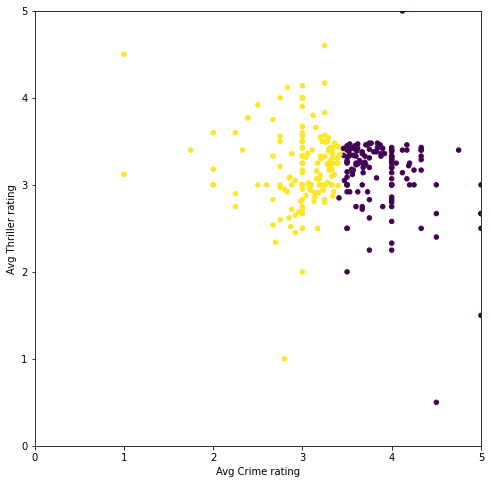

In [32]:
draw_clusters(refined_dataset_twogenre, predictions1)

So here we can see the data being divided into thwo groups/clusters:

- Users liking Crime genre
- Users liking Thriller genre

Lets try to break the data into one more cluster

In [33]:
kmeans_two_genre1 = KMeans(n_clusters=3, random_state=1)
predictions2 = kmeans_two_genre1.fit_predict(X)

Lets plot the clusters to have a better view.

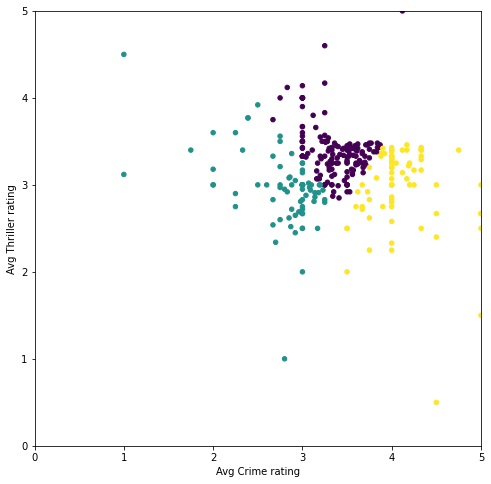

In [34]:
draw_clusters(refined_dataset_twogenre, predictions2)

Now we see one more group added. So with the new clustering we have:

- Users who like crime but not Thriller
- Users who like Thriller but not crime
- Users who like both

Lets add one more cluster and see the effect

In [35]:
kmeans_two_genre2 = KMeans(n_clusters=4, random_state=1)
predictions3 = kmeans_two_genre2.fit_predict(X)

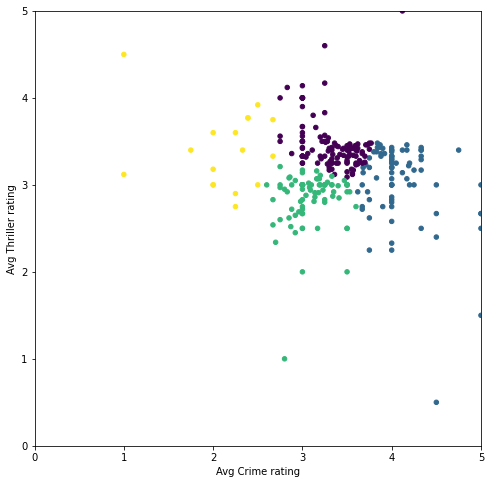

In [36]:
draw_clusters(refined_dataset_twogenre, predictions3)

So we can keep on adding clusters and refining the data groups from our dataset. The clusters accurately divide the users based on their likings(from ratings). But whats the optimum value for K or number of clusters. Lets figure that out.

**Select K or number of clusters**

To get the correct value for K(# of clusters), lets perform the above steps for a range of K values and plot the errors for each. We will use the Elbow Method to choose the K value.

In [37]:
def clustering_errors(k, data):
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions = kmeans.predict(data)
    silhouette_avg = silhouette_score(data, predictions)
    return silhouette_avg

In [40]:
list_of_k = range(2, len(X)+1, 5)

# Calculate error values for all above
errors_list = [clustering_errors(k, X) for k in list_of_k]

Now lets plot the errors to have a visual. The optimum K value will be where the score (Y axis) have seemingly higher values.

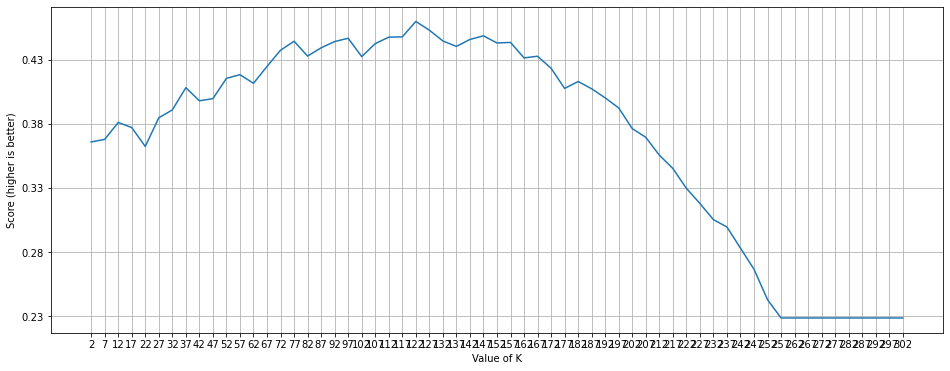

In [42]:
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('Value of K')
ax.set_ylabel('Score (higher is better)')
ax.plot(list_of_k, errors_list)

# Ticks and grid
xticks = np.arange(min(list_of_k), max(list_of_k)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_list), 2), max(errors_list), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

From the graph we can see possible K values can be 12,17,22,32,37,42,52,67,92 amongst other values. After these the score really dips a lot and we wont be going further down.

Lets pick K as 12 and perform the predictions.

In [43]:
kmeans_two_genre3 = KMeans(n_clusters=12, random_state=6)

# TODO: use fit_predict to cluster the dataset
predictions4 = kmeans_two_genre3.fit_predict(X)

Lets see how it looks now.

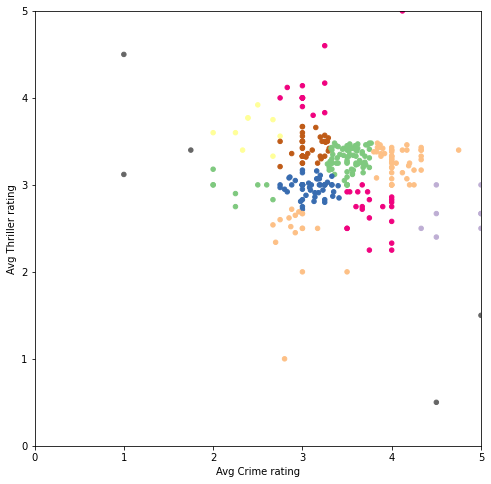

In [44]:
draw_clusters(refined_dataset_twogenre, predictions4, cmap='Accent')

**Lets add one more Genre**

Lets add Science-fiction(sci-fi) as another genre and perform the similar analysis as above.

In [45]:
refined_dataset_3genre = get_genre_ratings(ratings, movies, 
                                                     ['Crime', 'Thriller', 'Sci-Fi'], 
                                                     ['avg_crime_rating', 'avg_thriller_rating', 'avg_sci-fi_rating'])
refined_dataset_3genre = bias_genre_rating_dataset(refined_dataset_3genre, 3.5, 2.5).dropna()
refined_dataset_3genre.head()

,index,avg_crime_rating,avg_thriller_rating,avg_sci-fi_rating
0,2,2.39,3.77,3.86
1,4,3.68,3.20,3.00
3,12,3.57,3.17,3.06
4,18,3.15,3.66,3.65
5,19,3.28,3.03,3.66


In [46]:
X_sci_fi = refined_dataset_3genre[['avg_crime_rating', 'avg_thriller_rating', 'avg_sci-fi_rating']].values

With the new dataset, lets do a prediction using 12 clusters.

In [47]:
kmeans_three_genre1 = KMeans(n_clusters=12)
predictions_1_1 = kmeans_three_genre1.fit_predict(X_sci_fi)

Lets see how this looks now with 3 genres.

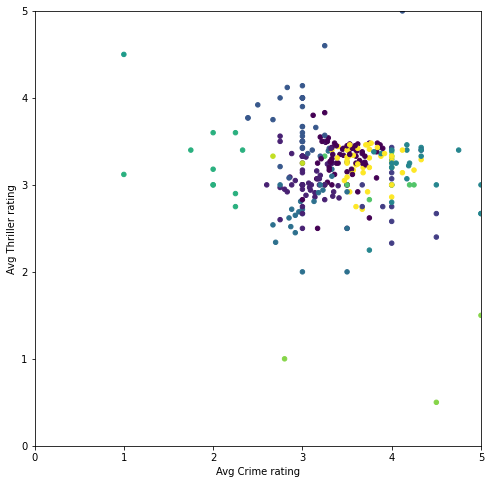

In [48]:
draw_clusters(refined_dataset_3genre, predictions_1_1)

The 3D cluster is not really visible on the above plot. Let's try to create 3D  visualization.

In [49]:
def draw_clusters_3d(biased_dataset_3, predictions):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg Crime rating')
    ax.set_ylabel('Avg Thriller rating')

    clustered = pd.concat([biased_dataset_3.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

    colors = itertools.cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

    for g in clustered.group.unique():
        color = next(colors)
        for index, point in clustered[clustered.group == g].iterrows():
            if point['avg_sci-fi_rating'].astype(float) > 3: 
                size = 50
            else:
                size = 15
            plt.scatter(point['avg_crime_rating'], 
                        point['avg_thriller_rating'], 
                        s=size, 
                        color=color)

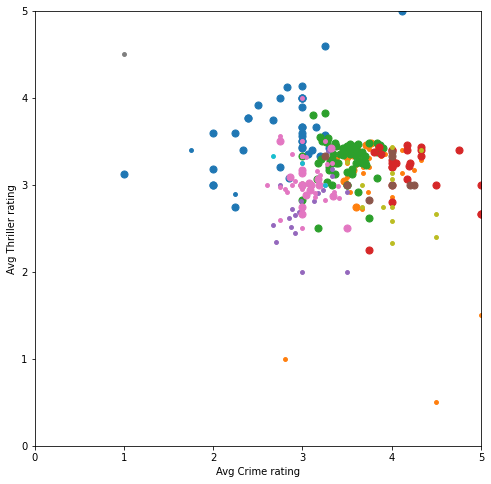

In [50]:
draw_clusters_3d(refined_dataset_3genre, predictions_1_1)

Now we can see how the clusters have changed. As the data input increases, the clusters become more refined. We wont add any more genres for now.

**Cluster the Movies based on ratings**

Now that we have seen how we can cluster based on Genres, lets change our approach and build the clusters based on user ratings on the movies.

**Prepare the dataset**

First we transform the input data so that its easier to view/analyze the ratings across users and movies. We will build a pivot table showing users and their ratings for each movie.

In [51]:
ratings_df = ratings.sample(n=10000)
ratings_df.head()

,userId,movieId,rating,timestamp
921394,25716,106696,4.0,1466449770
1976911,87262,6250,2.0,1074929311
1209783,54353,26169,4.5,1249347540
3075961,32886,6446,3.5,1334592068
1506042,5946,81845,3.5,1474551146


A previous attempt to pivot the table resulted in error:"Unstacked DataFrame is too big, causing int32 overflow", hence we created a sample of 10000 for each.

In [52]:
titles_df = pd.merge(ratings_df, movies[['movieId', 'title']], on='movieId' )
titles_df.head()

,userId,movieId,rating,timestamp,title
0,25716,106696,4.0,1466449770,Frozen (2013)
1,18169,106696,2.5,1407605927,Frozen (2013)
2,135444,106696,5.0,1489632247,Frozen (2013)
3,26477,106696,2.5,1506639648,Frozen (2013)
4,87262,6250,2.0,1074929311,Dreamcatcher (2003)


In [53]:
ratings_users = pd.pivot_table(titles_df, index='userId', columns= 'title', values='rating')
ratings_users.iloc[:5]

title,'Til There Was You (1997),"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),10 Things I Hate About You (1999),"10,000 BC (2008)",100 Girls (2000),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),...,Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zookeeper (2011),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that majority of the ratings are NA and understandable because not all users have rated all movies. So lets sort the data to have the most rated ones first.

In [54]:
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

In [55]:
def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    
    return most_rated_movies_users_selection

In [56]:
def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies

In [57]:
# shrinking the dataset for better visualization
num_movies = 30
num_users = 18
most_rated_sorted = sort_by_rating_density(ratings_users, num_movies, num_users)
most_rated_sorted.head()

title,Forrest Gump (1994),Independence Day (a.k.a. ID4) (1996),Schindler's List (1993),Terminator 2: Judgment Day (1991),Star Wars: Episode VI - Return of the Jedi (1983),"Dark Knight, The (2008)",Jurassic Park (1993),Pulp Fiction (1994),"Lord of the Rings: The Return of the King, The (2003)",Fight Club (1999),...,True Lies (1994),Batman (1989),Stargate (1994),Toy Story (1995),"Lord of the Rings: The Two Towers, The (2002)",Gladiator (2000),"Godfather, The (1972)",Seven (a.k.a. Se7en) (1995),Alien (1979),Babe (1995)
1546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1282,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN
4223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can almost see few ratings but the table still dominated by NaN values, we will visualize the data in a heatmap to identify rating clusters.

In [58]:
def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')

    if axis_labels:
        ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_movies_users_selection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    ax.grid(False)
    ax.set_ylabel('User id')

    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])



    plt.show()

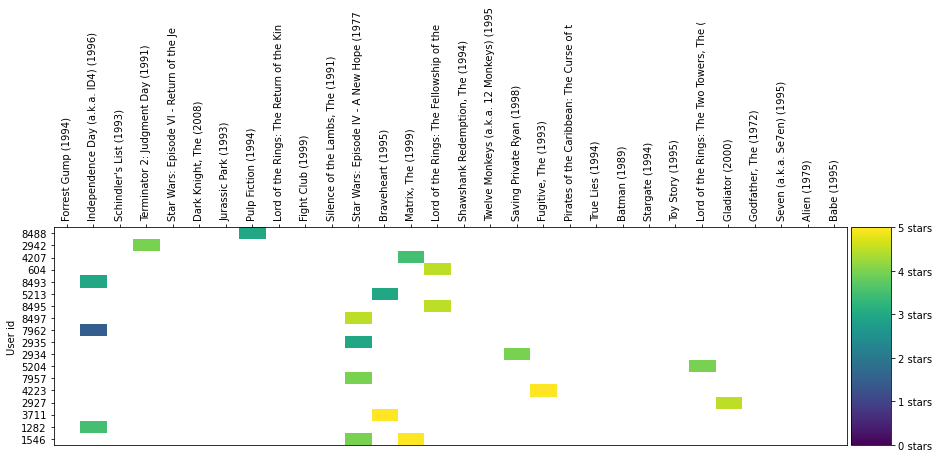

In [59]:
draw_movies_heatmap(most_rated_sorted)

This shows a visual of how users rated the movies. The white cells are when users didnt rate that movie. We handle this next.

For next steps, to have proper performance for this post, let me filter the dataset and work with a smaller dataset.

In [60]:
ratings_df_subset =  pd.pivot_table(titles_df, index='userId', columns= 'title', values='rating')
filtered_most_rated = get_most_rated_movies(ratings_df_subset, 2000)

**Get the Sparse matrix**

But the problem still remains where there are NA values in the dataset. To get around this, I will convert the dataset to sparse csr matrix.

In [61]:
# Remove all nulls
tmpmovies=filtered_most_rated.copy()
tmpmovies=tmpmovies.fillna(0)
dtcols=filtered_most_rated.columns
tmpdict={}
for v in dtcols:
    tmpdict[v]=pd.arrays.SparseArray(tmpmovies[v])
sparseFrame=pd.DataFrame(tmpdict)
sparse_ratings = csr_matrix(sparseFrame)

Now that we have the Sparse matrix for the ratings, lets perform some predictions.

**Perform Predictions**

In [62]:
new_k_values = range(2, 100+1, 5)
sparse_errors_k = [clustering_errors(k, sparse_ratings) for k in new_k_values]

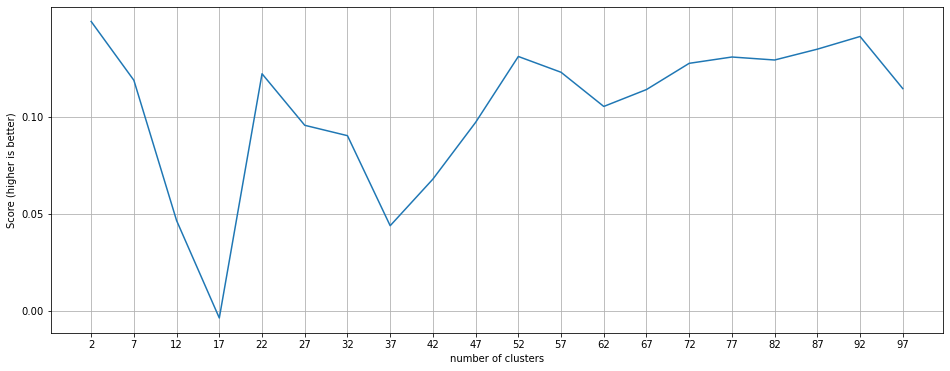

In [63]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('number of clusters')
ax.set_ylabel('Score (higher is better)')
ax.plot(new_k_values, sparse_errors_k)


xticks = np.arange(min(new_k_values), max(new_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(sparse_errors_k), 2), max(sparse_errors_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

looking at this graph its a bit undecisive regarding which value to take for K. Lets select one of 2,7,12,17,22,32, 42,47,52...

we choose k as 22

In [64]:
predictions_sparse_1 = KMeans(n_clusters=22, algorithm='full').fit_predict(sparse_ratings)

Lets visualize some of the clusters from above.

In [65]:
predict_cluster = pd.concat([filtered_most_rated.reset_index(), pd.DataFrame({'group':predictions_sparse_1})], axis=1)
predict_cluster.head()

,index,Forrest Gump (1994),Independence Day (a.k.a. ID4) (1996),Schindler's List (1993),Terminator 2: Judgment Day (1991),Star Wars: Episode VI - Return of the Jedi (1983),"Dark Knight, The (2008)",Jurassic Park (1993),Pulp Fiction (1994),"Lord of the Rings: The Return of the King, The (2003)",...,The Work of Director Chris Cunningham (2003),Star Trek: Nemesis (2002),Thesis (Tesis) (1996),Star Trek VI: The Undiscovered Country (1991),Star Trek Into Darkness (2013),"Thin Red Line, The (1998)",Thinner (1996),Thirteen Conversations About One Thing (a.k.a. 13 Conversations) (2001),"Star Is Born, A (1937)",group
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


The group column shows which cluster group the user belongs to based on the ratings. Now that we have the clustered dataset, lets see what type of predictions we can perform for this.

**Predictions from the cluster**

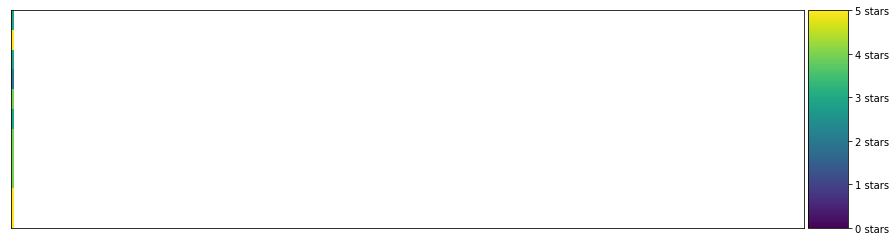

In [66]:
cluster_id = 5
newnum_users = 70
newnum_movies = 300
cluster_1 = predict_cluster[predict_cluster.group == cluster_id].drop(['index', 'group'], axis=1)
cluster_1 = sort_by_rating_density(cluster_1, newnum_movies, newnum_users)
draw_movies_heatmap(cluster_1, axis_labels=False)

This shows little to no results from our predictions, which in the previous it was observed that most of the data belong to 1 cluster and others were NaN. and we cannot go further training the model with the full dataset. The error faced is the one of memory allocation of the large data failed to be brought to memory to pivot the dataframe.

- another factor affecting our model, is the size of the subset does not qualify to be a representation of the full dataset.
- Given the growth in the number of movies in all genre, our model will fail in the near future.

This how the ratings table looks for the cluster...

In [67]:
cluster_1.fillna('').head()

,Leaving Las Vegas (1995),Forrest Gump (1994),Blank Check (1994),Police Academy 2: Their First Assignment (1985),Idiocracy (2006),"Bourne Legacy, The (2012)",Saturday Night Fever (1977),Iron Man 3 (2013),Man of Steel (2013),Cellular (2004),...,"Mariachi, El (1992)",Scrooged (1988),"Howling, The (1980)","Bridge on the River Kwai, The (1957)",Marie Antoinette (2006),Sixteen Candles (1984),"Twilight Saga: Eclipse, The (2010)",Mary Shelley's Frankenstein (Frankenstein) (1994),Anger Management (2003),Halloween (1978)
0,3.0,,,,,,,,,,...,,,,,,,,,,
1,5.0,,,,,,,,,,...,,,,,,,,,,
2,3.0,,,,,,,,,,...,,,,,,,,,,
3,2.0,,,,,,,,,,...,,,,,,,,,,
4,4.0,,,,,,,,,,...,,,,,,,,,,


The blank cells are because users didnt rate that specific movie. We can use the ratings from other users in the same cluster and get an average to get the specific rating for a blank cell. Let me demonstrate. First let me pick a movie

In [68]:
picked_movie='Leaving Las Vegas (1995)'

For all other users, where the cell is blank for this movie in this cluster, the predicted rating will be

In [69]:
cluster_1[picked_movie].mean()

3.8181818181818183

### Recommend Movies

Now that we have identified the clusters for users based on similar ratings they provided for the movies, we can use the cluster info to recommend movies to other users belonging to same cluster. If we see the mean score of ratings for some movies in a specific cluster, we will know the specific taste for that cluster

In [70]:
cluster_1.mean().head(10)

Leaving Las Vegas (1995)                           3.818182
Forrest Gump (1994)                               NaN      
Blank Check (1994)                                NaN      
Police Academy 2: Their First Assignment (1985)   NaN      
Idiocracy (2006)                                  NaN      
Bourne Legacy, The (2012)                         NaN      
Saturday Night Fever (1977)                       NaN      
Iron Man 3 (2013)                                 NaN      
Man of Steel (2013)                               NaN      
Cellular (2004)                                   NaN      
dtype: float64

**MODEL BASED COLLABORATIVE FILTERING**

In this section we will focus on building a collaborative filtering recomendation system that uses machine learnin models to predict the ratings a user would assign to a movie.

The suprise package has been desinged for making recomendations using collaborative filtering and has a variety of built-in models.

Since our original training data contains over 10 million rows, we will only train models on a subset of this. We will then choose the best performing model to be trained on the entire dataset. We subset our data by taking only those movies that have been reviewed over 500 times and only the users who have watched over 500 movies.

In [3]:
min_movie_ratings = 500
filter_movies = df_train['movieId'].value_counts() > min_movie_ratings
filter_movies = filter_movies[filter_movies].index.tolist()

min_user_ratings = 500
filter_users = df_train['userId'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df_train[(df_train['movieId'].isin(filter_movies)) & (df_train['userId'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df_train.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(10000038, 4)
The new data frame shape:	(750263, 4)


In [4]:
len(df_new)

750263

### Data Prep

In [5]:
from surprise import Reader, Dataset
reader = Reader(rating_scale=(0.5, 5.0))

### Comparing base models

In [6]:
svd=SVD()

In [7]:
from surprise.model_selection import cross_validate

In [8]:
def Compare_models(data,models,subset):
    ratings = data[['userId','movieId','rating']][:subset]
    data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
    benchmark = []
    # Iterate over all algorithms
    for algorithm in models:
        # Perform cross validation
        results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)

        # Get results & append algorithm name
        tmp = pd.DataFrame.from_dict(results).mean(axis=0)
        tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
        benchmark.append(tmp)   
    return pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [9]:
models=[SVD(), SVDpp(), SlopeOne(), NMF(), KNNBasic(), KNNWithMeans(), CoClustering()]
compare_10K=Compare_models(df_new,models,10000)
compare_10K

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.966296,2.970225,0.220211
SVD,0.971377,1.577623,0.308993
KNNBasic,1.037326,0.157254,0.135253
KNNWithMeans,1.077935,0.241521,0.089987
SlopeOne,1.087088,0.474452,0.050261
NMF,1.170227,1.550683,0.059578
CoClustering,1.180192,1.623701,0.040175


In [10]:
models=[SVD(), SVDpp(), SlopeOne(), NMF(), KNNBasic(), KNNWithMeans(), CoClustering()]
compare_20K=Compare_models(df_new,models,20000)
compare_20K

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.927778,7.329234,0.380635
SVD,0.939857,2.014569,0.137336
KNNWithMeans,1.035579,0.221336,0.286657
KNNBasic,1.073730,0.162182,0.213292
SlopeOne,1.074251,0.771204,0.143350
NMF,1.078890,2.483930,0.102656
CoClustering,1.084276,2.061368,0.065344


In [11]:
models=[SVD(), SVDpp(), SlopeOne(), NMF(), KNNBasic(), KNNWithMeans(), CoClustering()]
compare_50K=Compare_models(df_new,models,50000)
compare_50K

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.879109,31.627798,1.546960
SVD,0.884556,5.268029,0.386677
NMF,0.975771,6.217670,0.512003
CoClustering,0.976053,3.234687,0.241332
KNNWithMeans,1.020500,0.421332,1.197403
KNNBasic,1.123238,0.293319,0.956069
SlopeOne,1.162840,0.822218,0.823536


As we can see, the SVD and SVDpp models perform the best when minimizing the rmse. These models have really high fit times which could cause problems when attempting to run on the entire dataframe.

In [12]:
(pd.DataFrame(compare_50K)['fit_time']+pd.DataFrame(compare_50K)['test_time'])*pd.DataFrame(compare_50K)['test_rmse']

Algorithm
SVDpp           29.164242
SVD              5.001904
NMF              6.566620
CoClustering     3.392778
KNNWithMeans     1.651920
KNNBasic         1.403360
SlopeOne         1.913749
dtype: float64

The KNN based approaches have the best performance when taking into account the time and the rmse, while the SlopeOne method also performs well using this metric. The SVD model does not do well on this metric, but the fit time is considerably lower than SVDpp while also having the best RMSE out of the rest of the models.

In [13]:
# Top 4 model
models=[SVD(), SlopeOne(),KNNBasic(),KNNWithMeans()]
compare_top=Compare_models(df_new,models,-1)
compare_top

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.791423,80.994020,7.895746
KNNWithMeans,0.810057,17.436443,121.844004
SlopeOne,0.818641,35.426652,177.302378
KNNBasic,0.843721,18.665912,135.964088


In [14]:
(pd.DataFrame(compare_top)['fit_time']+pd.DataFrame(compare_top)['test_time'])*pd.DataFrame(compare_top)['test_rmse']

Algorithm
SVD              70.349440
KNNWithMeans    112.825144
SlopeOne        174.148692
KNNBasic        130.464591
dtype: float64

When using over 750000 rows it seems that the SVD model has the edge in both rmse and total time.

# Making submission

In [ ]:
def Make_prediction(model,data,test):
    data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader).build_full_trainset()
    model.fit(data)
    prediction=[]
    for _,row in test.iterrows():
        prediction.append(model.predict(row[0],row[1]).est)
    Ident=[]
    for _,row in test.iterrows():
        Ident.append(str(row[0])+'_'+str(row[1])) 
    submission=pd.DataFrame([])
    submission['Id']=Ident
    submission['rating']=prediction
    return model,submission

In [ ]:
svd=SVD()
model,submission=Make_prediction(svd,df_train,df_test)

In [ ]:
submission

In [ ]:
#submission.to_csv('SVD.csv', index = False)